# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
# print(train)
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.
import numpy as np

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = train['sizes'][0]

# TODO: how many classes are in the dataset
n_classes = np.max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print(train)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [29 30]
Number of classes = 43
{'features': array([[[[ 75,  78,  80],
         [ 74,  76,  78],
         [ 83,  84,  83],
         ..., 
         [ 67,  74,  73],
         [ 65,  69,  68],
         [ 66,  67,  66]],

        [[ 82,  83,  85],
         [ 80,  80,  82],
         [ 87,  86,  83],
         ..., 
         [ 73,  77,  77],
         [ 75,  77,  75],
         [ 79,  79,  77]],

        [[ 79,  79,  81],
         [ 84,  83,  85],
         [ 91,  88,  89],
         ..., 
         [ 72,  74,  72],
         [ 74,  75,  71],
         [ 78,  78,  74]],

        ..., 
        [[126, 128, 133],
         [118, 123, 128],
         [108, 117, 120],
         ..., 
         [ 96,  96,  90],
         [ 99, 101,  94],
         [ 99, 103,  99]],

        [[ 90,  94,  98],
         [ 91,  97, 103],
         [ 77,  87,  92],
         ..., 
         [104, 104,  97],
         [107, 111, 102],
         [ 95, 

[False False False ..., False False False]
2
2
2
2
2
[False  True False ..., False False False]
2
2
2
2
2
[False False False ..., False False False]
2
2
2
2
2
[False False False ..., False False False]
2
2
2
2
2
[False False False ..., False False False]
2
2
2
2
2
[False False False ..., False False False]
2
2
2
2
2
[False False False ...,  True False False]
2
2
2
2
2
[False False False ..., False  True False]
2
2
2
2
2
[False False False ..., False False False]
2
2
2
2
2
[False False False ..., False False False]
2
2
2
2
2
[False False False ..., False False  True]
2
2
2
2
2
[False False False ..., False False False]
2
2
2
2
2
[False False False ..., False False False]
2
2
2
2
2
[False False False ..., False False False]
2
2
2
2
2
[False False False ..., False False False]
2
2
2
2
2
[False False False ..., False False False]
2
2
2
2
2
[ True False False ..., False False False]
2
2
2
2
2
[False False False ..., False False False]
2
2
2
2
2
[False False False ..., False False False]
2
2

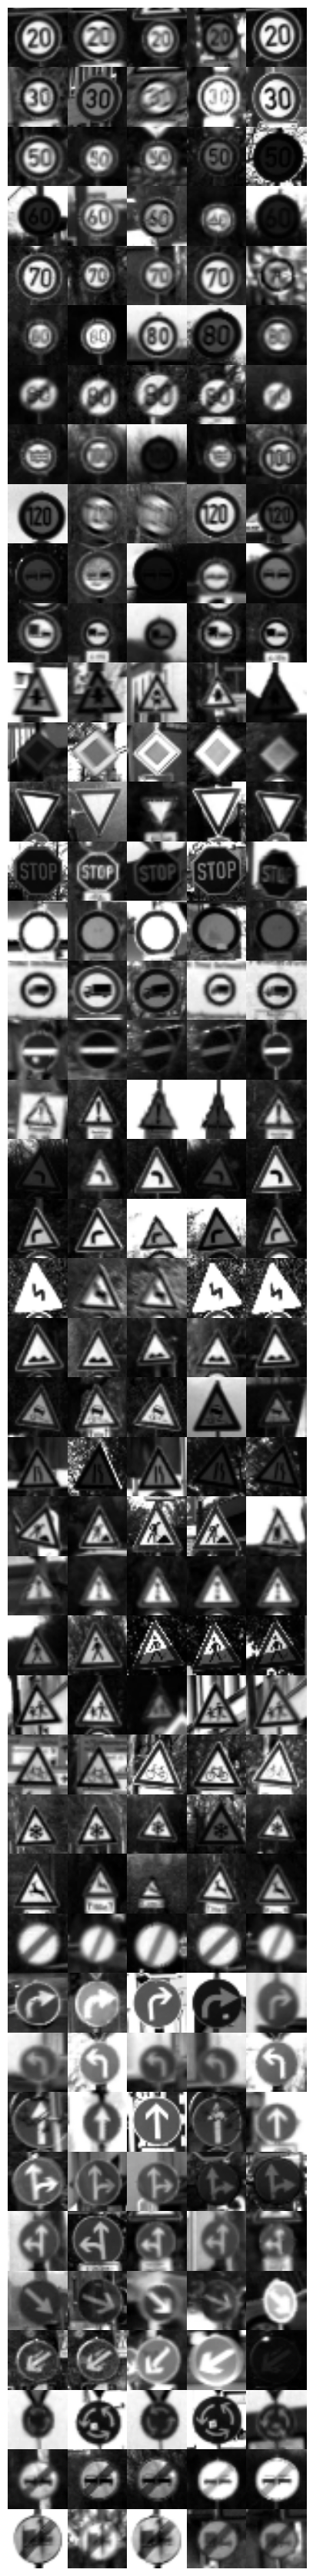

In [78]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
import numpy as np
import random

# plt.figure()
# plt.imshow(X_train[100])
# plt.imshow(X_train[200])
# plt.show()


## Borrowed from John Chen's comment in the forums

sample_size = 5 #five images per class label
n_labels = 43
count = 0 #book keeping for plots
fig = plt.figure(figsize=(sample_size, n_labels))
grid = gridspec.GridSpec(n_labels, sample_size, wspace=0.0, hspace=0.0)

y_test_processed_cls = np.asarray([np.asscalar(e.nonzero()[0]) for e in y_test_processed])
# print(y_test_processed_cls)

# print(X_test[:100])
# print(X_test_processed[:100])

for i in range(n_labels): #labelset_pbar:
#     ind = y_test == i
#     print(y_test)
#     print(ind)
#     subset_x = X_test[ind,] #get all images that belong to class i

    ind = y_test_processed_cls == i
    print(ind)
    subset_x = X_test_processed[ind,] #get all images that belong to class i
    for x in range(sample_size):
        img = random.choice(subset_x) #randomly pick on image from class i
        ax = plt.Subplot(fig, grid[count])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(img, cmap='gray')
        fig.add_subplot(ax)
        count +=1

    # hide the borders
    if i == (n_labels-1):
        all_axes = fig.get_axes()
        for ax in all_axes:
            for sp in ax.spines.values():
                sp.set_visible(False)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [77]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import hashlib
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from tqdm import tqdm
from zipfile import ZipFile
import tensorflow as tf
import cv2


print('All modules imported.')


########################### Preprocessing ###################################

def normalize_greyscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255
    return a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) )



plt.figure()
# plt.imshow(X_train[100])

# original_image = X_train[100];

# yCrCb = cv2.cvtColor(X_train[100], cv2.COLOR_BGR2YCrCb)
# print(yCrCb)
# plt.imshow(yCrCb)

height = 32
width = 32

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

print(len(X_val))

def preprocess(x, y):
    sample_size = len(x)
    sample_x_train = []
    sample_y_train = []

    for i in range(sample_size):
        gray = cv2.cvtColor(x[i], cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray,(width, height), interpolation = cv2.INTER_CUBIC)
        normalized = normalize_greyscale(resized)
#         normalized = normalized.reshape(-1)
        sample_x_train.append(normalized)
    #     sample_y_train.append((y_train[i]))

    lb = LabelBinarizer()
    sample_y_train = lb.fit_transform(y)[:sample_size]
    
    return np.asarray(sample_x_train), np.asarray(sample_y_train)
    
X_train_processed, y_train_processed = preprocess(X_train_new, y_train_new)
X_val_processed, y_val_processed = preprocess(X_val, y_val)
X_test_processed, y_test_processed = preprocess(X_test, y_test)

#print("sample x:", sample_x_train[0:2])
print("X_train_processed length: {}".format(len(X_train_processed)))
print("y_train_processed length: {}".format(len(y_train_processed)))
print("X_val_processed length: {}".format(len(X_val_processed)))
print("y_val_processed length: {}".format(len(y_val_processed)))
print("X_test_processed length: {}".format(len(X_test_processed)))
print("y_test_processed length: {}".format(len(y_test_processed)))
# print("processed X: ", X_train_processed)
# print("processed y: ", y_train_processed)

# print(gray)
# plt.imshow(gray, cmap='gray')
# plt.show()

# plt.imshow(res, cmap='gray')
# plt.show()



All modules imported.
12939
[16  1 38 ...,  6  7 10]
[[0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[[ 0.56117647  0.55490196  0.55803922 ...,  0.47960784  0.49529412
    0.44509804]
  [ 0.56745098  0.56117647  0.56431373 ...,  0.57058824  0.56431373
    0.55803922]
  [ 0.56431373  0.56745098  0.56117647 ...,  0.57686275  0.57686275
    0.57372549]
  ..., 
  [ 0.55176471  0.54235294  0.5454902  ...,  0.55176471  0.54862745
    0.55803922]
  [ 0.54862745  0.5454902   0.53607843 ...,  0.5454902   0.54862745
    0.55490196]
  [ 0.5454902   0.54235294  0.5454902  ...,  0.55176471  0.55176471
    0.55803922]]

 [[ 0.30705882  0.33843137  0.34156863 ...,  0.30705882  0.30705882
    0.31647059]
  [ 0.30078431  0.34784314  0.33843137 ...,  0.30705882  0.32588235
    0.31960784]
  [ 0.30078431  0.35098039  0.34470588 ...,  0.30705882  0.31647059
    0.31960784]
  ..., 
  [ 0.24431373  0.30705882  0.30392157 ...,  

In [14]:
#Multiplayer


##### # Parameters
learning_rate = 0.001
training_epochs = 1
batch_size = 100
display_step = 1

n_hidden_layer = 256 

# Store layers weight & bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# tf Graph input
x = tf.placeholder("float", [None, width, height, 1])
y = tf.placeholder("float", [None, n_classes])

x_flat = tf.reshape(x, [-1, n_input])

# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
# Output layer with linear activation
logits = tf.matmul(layer_1, weights['out']) + biases['out']

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})




NameError: name 'n_input' is not defined

In [15]:


def weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # TODO: Return weights
    return tf.Variable(tf.truncated_normal((n_features, n_labels)))


def biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    return tf.Variable(tf.zeros(n_labels))


def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    return tf.add(tf.matmul(input, w), b)

def single_layer(x):
    weights = tf.Variable(tf.truncated_normal((n_features, n_classes), stddev=0.05))
    biases = tf.Variable(tf.zeros(n_classes))
    logits = linear(x, weights, biases)
    return logits

def two_layer(x):
    n_hidden_layer = 256 

    # Store layers weight & bias
    weights = {
        'hidden_layer': tf.Variable(tf.random_normal([n_features, n_hidden_layer], stddev=0.05)),
        'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes], stddev=0.05))
    }
    biases = {
        'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
        'out': tf.Variable(tf.random_normal([n_classes]))
    }

    # tf Graph input
    #x = tf.placeholder("float", [None, width, height, 1])
    ## y = tf.placeholder("float", [None, n_classes])

    x_flat = tf.reshape(x, [-1, n_features])

    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
    layer_1 = tf.nn.relu(layer_1)
    # Output layer with linear activation
    logits = tf.matmul(layer_1, weights['out']) + biases['out']
    return logits


# Number of features (28*28 image is 784 features)
n_features = 1024
# Number of labels
n_classes = 43


# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 16         # There are 16 of these filters.

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 36         # There are 36 of these filters.

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.



features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

## WHERE THE MAGIC HAPPENS ##
#logits = single_layer(features)
logits = two_layer(features)

EPOCHS = 5 #10
BATCH_SIZE = 50

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, labels))
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def eval_data(x, y):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    # If dataset.num_examples is not divisible by BATCH_SIZE
    # the remainder will be discarded.
    # Ex: If BATCH_SIZE is 64 and training set has 55000 examples
    # steps_per_epoch = 55000 // 64 = 859
    # num_examples = 859 * 64 = 54976
    #
    # So in that case we go over 54976 examples instead of 55000.
    steps_per_epoch = len(x) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc, total_loss = 0, 0
    current_start = 0
    for step in range(steps_per_epoch):
        batch_x = x[current_start:current_start + BATCH_SIZE]
        batch_y = y[current_start:current_start + BATCH_SIZE]
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={features: batch_x, labels: batch_y})
        total_acc += (acc * len(batch_x)) #batch_x.shape[0])
        total_loss += (loss * len(batch_x)) #batch_x.shape[0])
        current_start += BATCH_SIZE
    return total_loss/num_examples, total_acc/num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    steps_per_epoch = len(X_train_processed) // BATCH_SIZE   # mnist.train.num_examples // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE

    # Train model
    for i in range(EPOCHS):
        current_start = 0
        for step in range(steps_per_epoch):
            batch_x = X_train_processed[current_start:current_start + BATCH_SIZE]
            batch_y = y_train_processed[current_start:current_start + BATCH_SIZE]
            loss = sess.run(train_op, feed_dict={features: batch_x, labels: batch_y})

        train_loss, train_acc = eval_data(X_train_processed, y_train_processed)
        val_loss, val_acc = eval_data(X_val_processed, y_val_processed)
        test_loss, test_acc = eval_data(X_test_processed, y_val_processed)
        print("EPOCH {} ...".format(i+1))
        print("Training loss = {:.3f}".format(train_loss))
        print("Training accuracy = {:.3f}".format(train_acc))
        print("Validation loss = {:.3f}".format(val_loss))
        print("Validation accuracy = {:.3f}".format(val_acc))
        print("Test loss = {:.3f}".format(test_loss))
        print("Test accuracy = {:.3f}".format(test_acc))
        print()






# with tf.Session() as session:
#     session.run(tf.global_variables_initializer())

#     # Softmax
#     prediction = tf.nn.softmax(logits)
    
#     # Cross entropy
#     # This quantifies how far off the predictions were.
#     # You'll learn more about this in future lessons.
#     cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

#     # Training loss
#     # You'll learn more about this in future lessons.
#     loss = tf.reduce_mean(cross_entropy)
    
# #     accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#     # Rate at which the weights are changed
#     # You'll learn more about this in future lessons.
#     learning_rate = 0.001

#     # Gradient Descent
#     # This is the method used to train the model
#     # You'll learn more about this in future lessons.
#     optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

#     # Run optimizer and get loss
#     _, l = session.run(
#         [optimizer, loss],
#         feed_dict={features: X_train_processed, labels: y_train_processed})

    
# # learning_rate = 0.001
# # training_epochs = 1
# # batch_size = 100
# # display_step = 1

# # with tf.Session() as sess:
# #     sess.run(tf.global_variables_initializer())
# #     # Training cycle
# #     for epoch in range(training_epochs):
# #         total_batch = int(len(X_train_new)/batch_size)
# #         # Loop over all batches
# #         for i in range(total_batch):
# #             batch_x, batch_y = mnist.train.next_batch(batch_size)
# #             # Run optimization op (backprop) and cost op (to get loss value)
# #             sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

# # Print loss
# print('Loss: {}'.format(l))

# print(prediction)







#Test Cases
# from tensorflow.python.ops.variables import Variable

# assert features._op.name.startswith('Placeholder'), 'features must be a placeholder'
# assert labels._op.name.startswith('Placeholder'), 'labels must be a placeholder'
# assert isinstance(weights, Variable), 'weights must be a TensorFlow variable'
# assert isinstance(biases, Variable), 'biases must be a TensorFlow variable'

# assert features._shape == None or (\
#     features._shape.dims[0].value is None and\
#     features._shape.dims[1].value in [None, 784]), 'The shape of features is incorrect'
# assert labels._shape in [None, 10], 'The shape of labels is incorrect'
# assert weights._variable._shape == (784, 10), 'The shape of weights is incorrect'
# assert biases._variable._shape == (10), 'The shape of biases is incorrect'

# assert features._dtype == tf.float32, 'features must be type float32'
# assert labels._dtype == tf.float32, 'labels must be type float32'

# # Feed dicts for training, validation, and test session
# train_feed_dict = {features: train_features, labels: train_labels}
# valid_feed_dict = {features: valid_features, labels: valid_labels}
# test_feed_dict = {features: test_features, labels: test_labels}

# # Linear Function WX + b
# logits = tf.matmul(features, weights) + biases

# prediction = tf.nn.softmax(logits)

# # Cross entropy
# cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

# # Training loss
# loss = tf.reduce_mean(cross_entropy)

# # Create an operation that initializes all variables
# init = tf.initialize_all_variables()

# # Test Cases
# with tf.Session() as session:
#     session.run(init)
#     session.run(loss, feed_dict=train_feed_dict)
#     session.run(loss, feed_dict=valid_feed_dict)
#     session.run(loss, feed_dict=test_feed_dict)
#     biases_data = session.run(biases)

# assert not np.count_nonzero(biases_data), 'biases must be zeros'

# print('Tests Passed!')

EPOCH 1 ...
Training loss = 10.481
Training accuracy = 0.154
Validation loss = 10.393
Validation accuracy = 0.158
Test loss = 13.563
Test accuracy = 0.043

EPOCH 2 ...
Training loss = 11.717
Training accuracy = 0.154
Validation loss = 11.621
Validation accuracy = 0.158
Test loss = 15.252
Test accuracy = 0.043

EPOCH 3 ...
Training loss = 12.452
Training accuracy = 0.154
Validation loss = 12.352
Validation accuracy = 0.159
Test loss = 16.249
Test accuracy = 0.042

EPOCH 4 ...
Training loss = 13.000
Training accuracy = 0.154
Validation loss = 12.897
Validation accuracy = 0.159
Test loss = 16.991
Test accuracy = 0.042

EPOCH 5 ...
Training loss = 13.449
Training accuracy = 0.155
Validation loss = 13.344
Validation accuracy = 0.159
Test loss = 17.599
Test accuracy = 0.042

EPOCH 6 ...
Training loss = 13.838
Training accuracy = 0.155
Validation loss = 13.731
Validation accuracy = 0.159
Test loss = 18.127
Test accuracy = 0.042

EPOCH 7 ...
Training loss = 14.188
Training accuracy = 0.155
Val

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import flatten


if __name__ == '__main__':
    # Load data
    mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
    
    batch_x, batch_y = mnist.train.next_batch(10)
    print(batch_x.shape[0], len(batch_x), len(batch_x[0]))
    print(batch_y.shape[0])


# Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [2]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [5]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [4]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.